# 基于深度学习框架Pytorch transforms 方法进行数据的预处理

作者：沈福利  北京工业大学硕士学位，高级算法专家。产品和技术负责人，专注于NLP、图像、推荐系统

整个过程主要包括：缩放、裁剪、归一化、标准化几个基本步骤。


图像归一化是计算机视觉、模式识别等领域广泛使用的一种技术。所谓图像归一化, 就是通过一系列变换, 将待处理的原始图像转换成相应的唯一标准形式(该标准形式图像对平移、旋转、缩放等仿射变换具有不变特性)

基于矩的图像归一化过程包括 4 个步骤 即坐标中心化、x-shearing 归一化、缩放归一化和旋转归一化。

## Pytorch：transforms方法
1. 裁剪——Crop

中心裁剪：transforms.CenterCrop  
随机裁剪：transforms.RandomCrop  
随机长宽比裁剪：transforms.RandomResizedCrop  
上下左右中心裁剪：transforms.FiveCrop  
上下左右中心裁剪后翻转，transforms.TenCrop  

2. 翻转和旋转——Flip and Rotation

依概率p水平翻转：transforms.RandomHorizontalFlip(p=0.5)    
依概率p垂直翻转：transforms.RandomVerticalFlip(p=0.5)  
随机旋转：transforms.RandomRotation  

3. 图像变换

resize：transforms.Resize   
标准化：transforms.Normalize    
转为tensor，并归一化至[0-1]：transforms.ToTensor 
填充：transforms.Pad    
修改亮度、对比度和饱和度：transforms.ColorJitter    
转灰度图：transforms.Grayscale   
线性变换：transforms.LinearTransformation()   
仿射变换：transforms.RandomAffine   
依概率p转为灰度图：transforms.RandomGrayscale  
将数据转换为PILImage：transforms.ToPILImage  
transforms.Lambda：Apply a user-defined lambda as a transform.  

4. 对transforms操作，使数据增强更灵活

transforms.RandomChoice(transforms)， 从给定的一系列transforms中选一个进行操作  
transforms.RandomApply(transforms, p=0.5)，给一个transform加上概率，依概率进行操作  
transforms.RandomOrder，将transforms中的操作随机打乱  

# 导入库

In [8]:
# pytorch 相关的库
import torch
import torchvision
from torchvision import transforms
print('torch = ',torch.__version__)
print('torchvision = ',torchvision.__version__)

torch =  1.2.0
torchvision =  0.4.0


# 加载图片数据

input_image.shape =  (1024, 942)


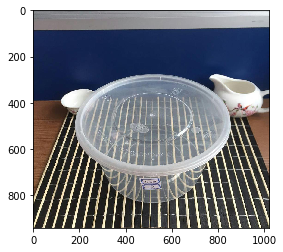

In [22]:
file_name = '../data/40_garbage-classify-for-pytorch/train/0/img_4.jpg'

from PIL import Image
input_image = Image.open(file_name)
# 图片的尺寸
print('input_image.shape = ',input_image.size)

# 数据处理后，我们通过可视化方式来进行效果展示
import matplotlib.pyplot as plt
%matplotlib inline
ax = plt.imshow(input_image)

# pytorch 数据预处理

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


input_tensor.shape =  torch.Size([3, 224, 224])
tensor([[[ 0.2282,  0.2111,  0.2111,  ...,  1.0159,  1.0159,  1.0159],
         [ 0.1939,  0.1768,  0.1939,  ...,  1.0331,  1.0502,  1.0502],
         [ 0.1768,  0.1768,  0.1939,  ...,  1.0502,  1.0502,  1.0502],
         ...,
         [ 1.7694,  1.4440, -0.9705,  ..., -1.1418, -1.1075,  0.0569],
         [ 1.8722,  0.7248, -1.3473,  ..., -1.1589, -1.0562, -0.5767],
         [ 1.9064,  0.1426, -1.4500,  ..., -1.0904, -0.9877, -0.9020]],

        [[ 0.1877,  0.1702,  0.1702,  ...,  1.2206,  1.2206,  1.2381],
         [ 0.1352,  0.1352,  0.1527,  ...,  1.2381,  1.2556,  1.2556],
         [ 0.1176,  0.1176,  0.1352,  ...,  1.2206,  1.2206,  1.2206],
         ...,
         [ 1.7283,  1.4832, -0.9153,  ..., -0.9503, -0.9678,  0.1352],
         [ 1.8333,  0.8004, -1.2829,  ..., -0.9503, -0.8978, -0.4951],
         [ 1.8683,  0.1877, -1.3704,  ..., -0.9678, -0.8627, -0.7577]],

        [[ 0.4265,  0.4091,  0.4091,  ...,  1.5245,  1.5245,  1.5245

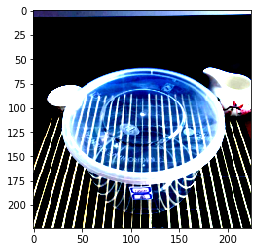

In [44]:
# 定义pytoch 预处理的方法

preprocess = transforms.Compose([
    # 图像变了： 对我们的图片进行缩放
    transforms.Resize((256,256)),
    # 裁剪： 中心剪裁
    transforms.CenterCrop(224),
    # 数据归一化操作[0,1]
    transforms.ToTensor(),
    # 图像数据标准化
    transforms.Normalize(mean = [0.485,0.456,0.406],std=[0.229,0.224,0.225])
])


# 原始数据－预处理操作
input_tensor = preprocess(input_image)
print('input_tensor.shape = ',input_tensor.shape)
print(input_tensor)
# 数据的可视化展示
import matplotlib.pyplot as plt
%matplotlib inline

input_tensor = input_tensor.permute(1,2,0)
print('input_tensor.shape2 = ',input_tensor.shape)
plt.imshow(input_tensor)